#  BMI Data Analysis and Prediction

---------------
## Context
---------------

BMI stands for Body Mass Index. It is a measure of a person's body fat based on their height and weight. It is calculated by dividing a person's weight in kilograms by the square of their height in meters (BMI = weight(kg) / height(m)^2). BMI is widely used as a simple and inexpensive screening tool to identify whether a person is underweight, normal weight, overweight, or obese for their height.

BMI has been widely adopted by healthcare professionals, researchers, and public health officials as a tool for monitoring trends in population health and for identifying individuals who may be at risk for weight-related health problems. It is important to understand the significance of BMI and how it can be used to improve health outcomes.


-----------------
## Objective
-----------------

The aim is to create a linear regression model that predicts the BMI  

-------------------------
## Data Dictionary
-------------------------

The dataset has the following information:

* **Height (M)**: This variable represents the height of an individual in meters. Height is an important factor in determining body composition and is often used in calculating other measurements like BMI.

* **Weight (kg)**: This variable represents the weight of an individual in kilograms. Weight is an important factor in determining body composition and is often used in calculating other measurements like BMI.

* **BMI**: BMI stands for Body Mass Index, and is calculated as the ratio of an individual's weight in kilograms to the square of their height in meters (kg/m^2). BMI is a widely used measure of body composition that helps to determine if a person is underweight, normal weight, overweight or obese.

* **%Fat**: This variable represents the percentage of body fat that an individual has. Body fat percentage is an important measure of health and fitness, as high levels of body fat are associated with increased risk of various health problems, including heart disease, diabetes, and certain types of cancer.

### Importing the necessary libraries for the analysis of the Data

In [1]:
import pandas as pd
import numpy as np

- Numpy (coined from the two words, numerical-python) is is a Python library used for mathematical or numerical    computations. With numpy we can create, access, manipulate and perform several operations on multidimensional data

- Pandas (coined from words, Panel-Data, commonly used in econometrics) allows us do carry out operations on structured tabular data

In [2]:
# reading the csv file containing the dataset into jupyter notebook from local file storage location

df = pd.read_csv(r"C:\Users\Victor Adekunle\Dropbox\PC\Downloads\Data Analyst Technical Test - Data.csv")

In [3]:
df

,Height M,Weight kg,BMI,%Fat
0,1.60020,49.441572,19.308287,23.9
1,1.65100,62.595751,22.964168,28.8
2,1.65100,75.749931,27.789971,32.4
3,1.53035,48.987979,20.917414,25.8
4,1.45415,43.091278,20.378441,22.5
...,...,...,...,...
87,1.49225,39.008946,17.517860,23.3
88,1.60020,41.276908,16.119762,20.1
89,1.42240,38.101762,18.832222,30.3
90,1.39700,30.163895,15.455911,20.6


In [4]:
#  .info() generates the basic information of the dataset like the number of roles and columns, the data types and the non-null rows

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Height M   92 non-null     float64
 1   Weight kg  92 non-null     float64
 2   BMI        92 non-null     float64
 3   %Fat       92 non-null     float64
dtypes: float64(4)
memory usage: 3.0 KB


In [5]:
# To generate the number of null rows and sum them up with

df.isnull().sum()

Height M     0
Weight kg    0
BMI          0
%Fat         0
dtype: int64

There is no missing value in the dataset

In [6]:
# to generate the summary statistics of the dataset

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Height M,92.0,1.511921,0.074101,1.333500,1.460500,1.498600,1.570037,1.663700
Weight kg,92.0,47.865091,13.076789,29.256710,38.952247,45.472638,52.701767,87.543333
BMI,92.0,20.705779,4.325132,14.986302,17.708670,19.478923,22.736931,34.461025
%Fat,92.0,26.961957,7.142888,15.600000,21.075000,25.500000,31.975000,46.000000


These summary statistics provide an overview of the distribution of the variables in the dataset, which is useful for identifying any potential outliers or unusual values.

- Height (M): This variable represents the height of the individuals in meters. The mean height is 1.51 meters with a standard deviation of 0.074 meters. The minimum height is 1.33 meters and the maximum height is 1.66 meters.

- Weight (kg): This variable represents the weight of the individuals in kilograms. The mean weight is 47.87 kg with a standard deviation of 13.08 kg. The minimum weight is 29.26 kg and the maximum weight is 87.54 kg.

- BMI: This variable represents the body mass index of the individuals. The mean BMI is 20.71 with a standard deviation of 4.33. The minimum BMI is 14.99 and the maximum BMI is 34.46.

- %Fat: This variable represents the percentage of body fat of the individuals. The mean %Fat is 26.96% with a standard deviation of 7.14%. The minimum %Fat is 15.6% and the maximum %Fat is 46%.

In [7]:
# Importing more libraries for visualization

import seaborn as sns
import matplotlib.pyplot as plt


<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


- matplotlib is an interractive visualization library used in python built from MATLAB

- Seaborn is another library used for visualization, built on matplotlib. It provides an interface for more sophisticated, informatic and attractive statistical graphics

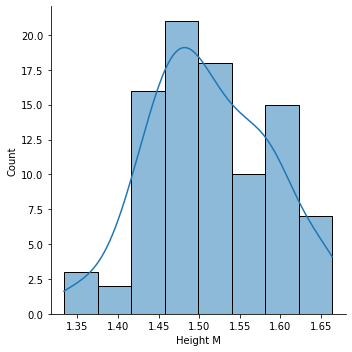

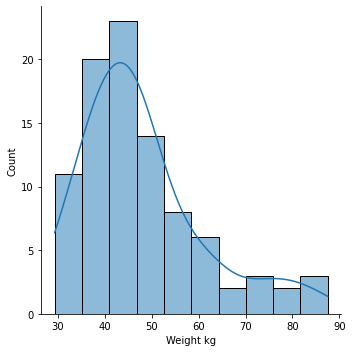

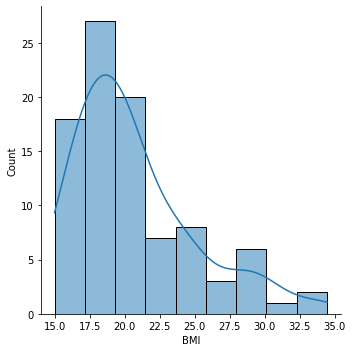

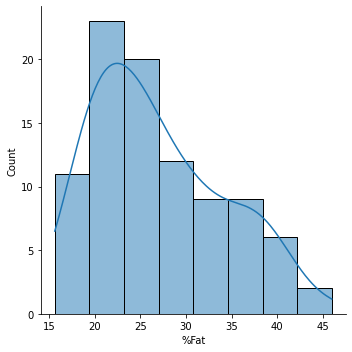

In [8]:
sns.displot(df['Height M'], kind='hist', kde=True)
sns.displot(df['Weight kg'], kind='hist', kde=True)
sns.displot(df['BMI'], kind='hist', kde=True)
sns.displot(df['%Fat'], kind='hist', kde=True)

plt.show()

The sns.displot() function above created a histogram-like plot for the data and it shows a density estimate of the distribution. This can help to visualize the shape of the distribution and identify any skewness or outliers.

BMI, Weight and %Fat are Right-Skewed

### Using Boxplot to check for outliers in the variables

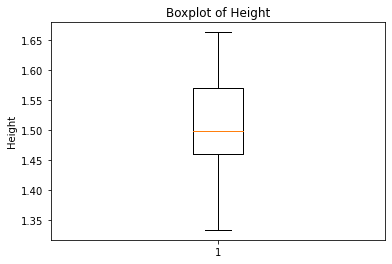

In [9]:
plt.boxplot(df['Height M'])
plt.title('Boxplot of Height')
plt.ylabel('Height')
plt.show()

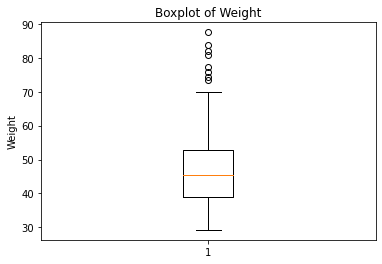

In [10]:
plt.boxplot(df['Weight kg'])
plt.title('Boxplot of Weight')
plt.ylabel('Weight')
plt.show()

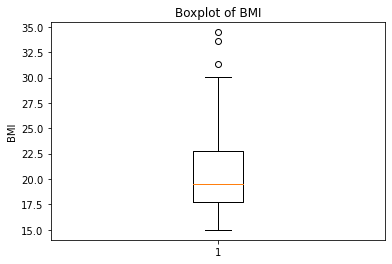

In [11]:
plt.boxplot(df['BMI'])
plt.title('Boxplot of BMI')
plt.ylabel('BMI')
plt.show()

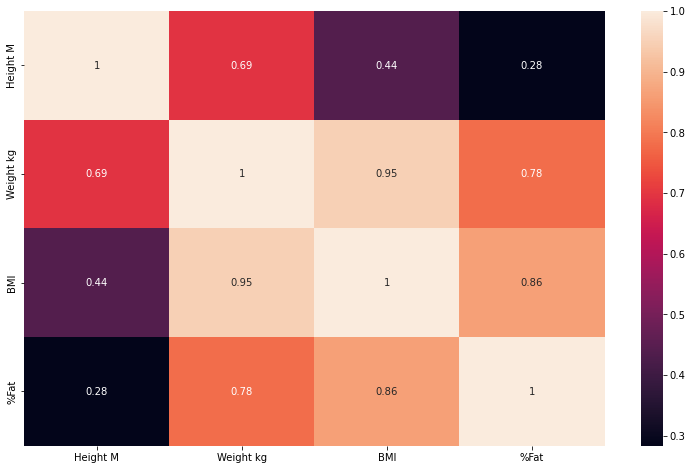

In [12]:
# To visualise correlation between variables in the datasetb

plt.figure(figsize=(13, 8))
sns.heatmap(data=df.corr(), annot = True);

- The level of correlation in the above visuals is depicted by how light the colour plates. There is a very high correlation between BMI and Weight(kg) while there is little or ignorable correlation between  %Fat and Height (M).

# To create the Linear regression model and Predict

In [13]:
#importing the necessary libraries

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# split the data into independent (X) and dependent (y) variables
# Note %Fat is not used in calculation of body mass index, BMI is calculate with Height and Weight while %Fat is variable derived from a couple of other varibales
X = df[['Height M', 'Weight kg']]
y = df['BMI']

# create a linear regression model and fit it to the data
model = LinearRegression()
model.fit(X, y)

# use the model to make predictions on the test data
y_pred = model.predict(X)

# evaluate the performance of the model using mean squared error and R-squared
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print('Mean squared error:', mse)
print('R-squared:', r2)


Mean squared error: 0.1808097227168271
R-squared: 0.9902283141550076


# Recommendation

The mean squared error (MSE) represents the average squared difference between the predicted BMI and the actual BMI. The lower the MSE, the better the model's performance. The R-squared (r2) represents the proportion of variance in the BMI that is explained by the model. The higher the r2, the better the model's performance.
The R-squared of 0.99 shows the model is performing well but the mean squared error of 0.18 indicates that there is still some error in the prediction.

In this case the entire dataset was used to model/predict, however to improve the performance of the model I will split the data into training and testing sets and apply cross-validation to get a better estimate of the model's performance. It also helps to reduce the risk of overfitting



# Vortex-BMI-Calculator

In [19]:
# BMI = (weight in pounds x 703) / (height in inches x height in inches)

# Under 18.5	Underweight	Minimal
# 18.5 - 24.9	Normal Weight	Minimal
# 25 - 29.9	Overweight	Increased
# 30 - 34.9	Obese	High
# 35 - 39.9	Severely Obese	Very High
# 40 and over	Morbidly Obese	Extremely High

name= input("Enter your name: ")

weight = float(input("Enter your weight in kg: "))

height = float(input("Enter your height in meters: "))

BMI = weight / (height ** 2)

print("{:.6f}".format(BMI))

if BMI > 0:
    if(BMI < 18.5):
        print(name +", is are underweight.")
    elif(BMI < 24.9):
        print(name +", is are normal weight.")
    elif(BMI < 29.9):
        print(name +", is are a overweight.")
    elif(BMI < 34.9):
        print(name +", is are obese.")
    elif(BMI < 39.9):
        print(name +", is are severely obese.")
    else:
        print(name +", is are morbidly obese")
else:
    print("Enter valid input")


Enter your name: Candidate 1
Enter your weight in kg: 49.441572
Enter your height in meters: 1.60020
19.308287
Candidate 1, is are normal weight.
